Задания
1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд.

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sns.set(
    style='whitegrid',
    rc={'figure.figsize':(20, 8)})

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
Есть ли в данных пропущенные значения?

In [6]:
bikes = pd.read_csv('./london.csv')

In [7]:
bikes.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [13]:
bikes.shape

(17414, 10)

In [8]:
bikes.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [9]:
bikes.timestamp = bikes.timestamp.apply(pd.to_datetime)

In [10]:
bikes.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [11]:
bikes.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

2. Для начала попробуем посмотреть на число поездок по датам и времени

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

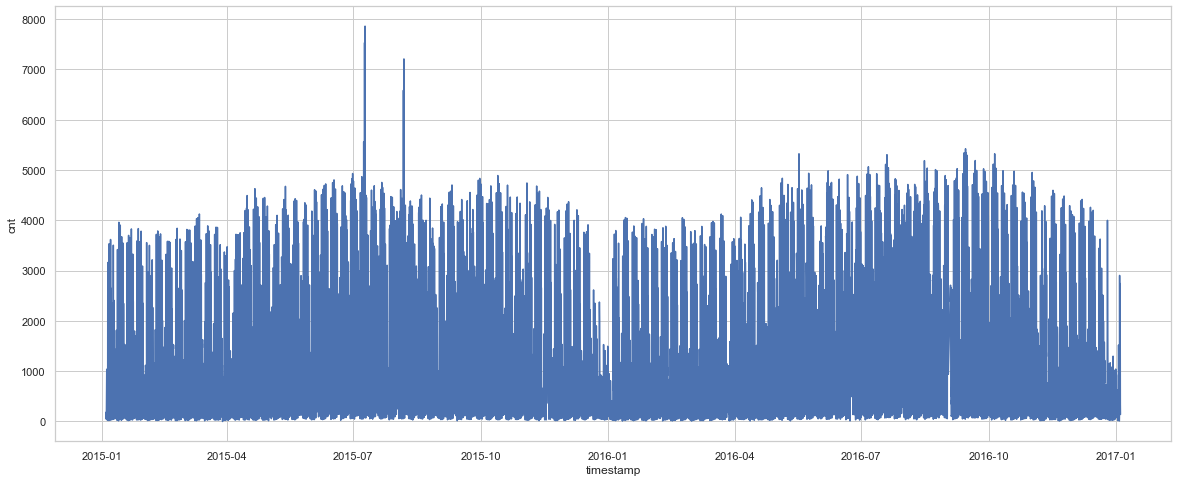

In [16]:
sns.lineplot(data=bikes, x='timestamp', y='cnt')

3. Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

<AxesSubplot:xlabel='timestamp'>

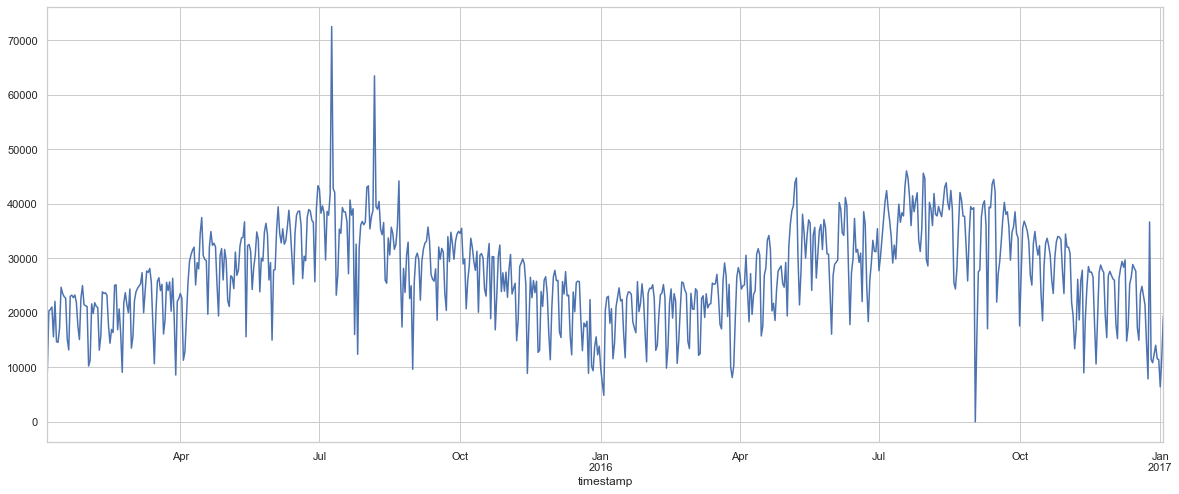

In [26]:
bikes[['timestamp', 'cnt']].set_index('timestamp').resample(rule='D').cnt.sum().plot()

- Максимальное число аренд за день составляет более 70 000
- Встречаются как очень резкие скачки числа аренд, так и падения
- Зимой число аренд меньше, чем летом

4. Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔. \
    На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [34]:
bikes_rol = bikes[['timestamp', 'cnt']].set_index('timestamp').resample(rule='D').cnt.sum().rolling(3).mean()
bikes_rol

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    16739.666667
2015-01-07    20683.000000
2015-01-08    19092.666667
                  ...     
2016-12-30    12682.000000
2016-12-31    12347.333333
2017-01-01     9803.666667
2017-01-02     9889.333333
2017-01-03    12560.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [35]:
bikes_rol.loc['2015-07-09']

50705.0

5. Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения \
    В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [53]:
pd.DataFrame(bikes_rol)

cnt
timestamp        
2015-01-04   9234
2015-01-05  20372
2015-01-06  20613
2015-01-07  21064
2015-01-08  15601
...           ...
2016-12-30  11566
2016-12-31  11424
2017-01-01   6421
2017-01-02  11823
2017-01-03  19436

[731 rows x 1 columns]

In [58]:
df = pd.DataFrame(bikes[['timestamp', 'cnt']].set_index('timestamp').resample(rule='D').cnt.sum())

In [59]:
df.reset_index()

timestamp    cnt
0   2015-01-04   9234
1   2015-01-05  20372
2   2015-01-06  20613
3   2015-01-07  21064
4   2015-01-08  15601
..         ...    ...
726 2016-12-30  11566
727 2016-12-31  11424
728 2017-01-01   6421
729 2017-01-02  11823
730 2017-01-03  19436

[731 rows x 2 columns]

In [60]:
df['rol'] = df.cnt.rolling(3).mean()

In [62]:
df['fin'] = df.cnt - df.rol

In [74]:
std = round(np.std(df.fin),2)
std

4558.59

6. Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты: \
    upper_bound – верхняя граница; к средним прибавляем 2.576 * std \
    lower_bound – нижняя граница; вычитаем 2.576 * std\
    Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.\
    Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

In [118]:
upper_bound = df.rol + 2.576 * np.std(df.fin)
upper_bound

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    28482.585854
2015-01-07    32425.919188
2015-01-08    30835.585854
                  ...     
2016-12-30    24424.919188
2016-12-31    24090.252521
2017-01-01    21546.585854
2017-01-02    21632.252521
2017-01-03    24302.919188
Freq: D, Name: rol, Length: 731, dtype: float64

In [119]:
lower_bound = df.rol - 2.576 * np.std(df.fin)
lower_bound

timestamp
2015-01-04            NaN
2015-01-05            NaN
2015-01-06    4996.747479
2015-01-07    8940.080812
2015-01-08    7349.747479
                 ...     
2016-12-30     939.080812
2016-12-31     604.414146
2017-01-01   -1939.252521
2017-01-02   -1853.585854
2017-01-03     817.080812
Freq: D, Name: rol, Length: 731, dtype: float64

In [120]:
df['upper_bound'] = upper_bound

In [121]:
df['lower_bound'] = lower_bound

In [123]:
df.tail(1).upper_bound.round(2)

timestamp
2017-01-03    24302.92
Freq: D, Name: upper_bound, dtype: float64

7. И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.\
    В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [131]:
df['big'] = df.cnt > df.upper_bound

In [137]:
df.query('big == True').cnt.idxmax()

Timestamp('2015-07-09 00:00:00')

8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд

In [141]:
df[df.cnt < df.upper_bound].cnt.idxmin()

Timestamp('2016-09-02 00:00:00')